In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.0)
sns.set_style("white")
sns.set_style("ticks")
palette = sns.color_palette('deep')

df = pd.read_csv('data/data100m.csv')
df.columns=['Year', 'Time']
N = df.shape[0]

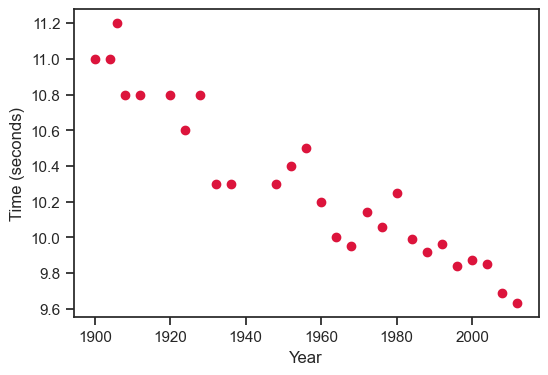

In [25]:
fig = plt.figure(figsize=(6,4))
plt.plot(df['Year'].values, df['Time'].values, 'o', color='crimson')
plt.xlabel('Year')
plt.ylabel('Time (seconds)')
plt.savefig('olympics.png', dpi=150, bbox_inches='tight')
plt.show()

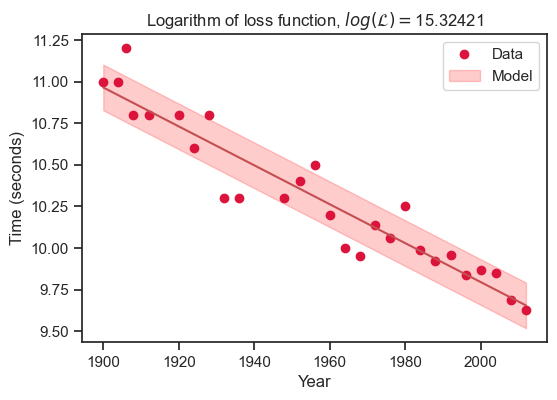

In [65]:
max_year, min_year = df['Year'].values.max() , df['Year'].values.min()

x = (df['Year'].values.reshape(N,1) - min_year)/(max_year - min_year)
t = df['Time'].values.reshape(N,1)
X_func = lambda u : np.hstack([np.ones((u.shape[0],1)), u ])
X = X_func(x)
w_hat = np.linalg.inv(X.T @ X) @ X.T @ t
loss_func = 1./N * (t - X @ w_hat).T @ (t - X @ w_hat)

xgrid = np.linspace(0, 1, 100).reshape(100,1)
Xg = X_func(xgrid)
time_grid = Xg @ w_hat


xi = xgrid*(max_year - min_year) + min_year
xi = xi.flatten()
sigma_hat_squared = float( (1. / N) * (t.T @ t - t.T @ X @ w_hat) )
sigma_hat = np.sqrt(sigma_hat_squared)
yi = xi* 0 + sigma_hat

loss_func =  -N/2 * np.log(np.pi * 2)  - N * np.log(sigma_hat) - \
                   1./(2 * sigma_hat_squared) * np.sum((X @ w_hat - t)**2) 

fig = plt.figure(figsize=(6,4))
a, = plt.plot(df['Year'].values, df['Time'].values, 'o', color='crimson', label='Data')
plt.plot(xi, time_grid, '-', color='r')
c = plt.fill_between(xi, time_grid.flatten()-yi, time_grid.flatten()+yi, color='red', alpha=0.2, label='Model')
plt.xlabel('Year')
plt.ylabel('Time (seconds)')
loss_title = r'Logarithm of loss function, $log \left( \mathcal{L} \right)=$'+str(np.around(float(loss_func), 5))
plt.title(loss_title)
plt.legend([a,c], ['Data', 'Model'])
plt.savefig('olympics_last.png', dpi=150, bbox_inches='tight')
plt.show()

In [58]:
max_year, min_year = df['Year'].values.max() , df['Year'].values.min()

x = (df['Year'].values.reshape(N,1) - min_year)/(max_year - min_year)
t = df['Time'].values.reshape(N,1)
X_func = lambda u : np.hstack([np.ones((u.shape[0],1)), u , u**2, u**3 , u**4, u**5, u**6, u**7, u**8])
X = X_func(x)
w_hat = np.linalg.inv(X.T @ X) @ X.T @ t
loss_func = 1./N * (t - X @ w_hat).T @ (t - X @ w_hat)

xgrid = np.linspace(0, 1, 100).reshape(100,1)
Xg = X_func(xgrid)
time_grid = Xg @ w_hat

fig = plt.figure(figsize=(6,4))
plt.plot(df['Year'].values, df['Time'].values, 'o', color='crimson', label='Data')
plt.plot(xgrid*(max_year - min_year) + min_year, time_grid, '-', color='dodgerblue', label='Model')
plt.xlabel('Year')
plt.ylabel('Time (seconds)')
loss_title = r'Loss function, $\mathcal{L}=$'+str(np.around(float(loss_func), 5))+'; \t norm of $\hat{\mathbf{w}}$='+str(np.around(float(np.linalg.norm(w_hat,2)), 3))
plt.title(loss_title)
plt.legend()
plt.savefig('olympics_8.png', dpi=150, bbox_inches='tight')
plt.show()

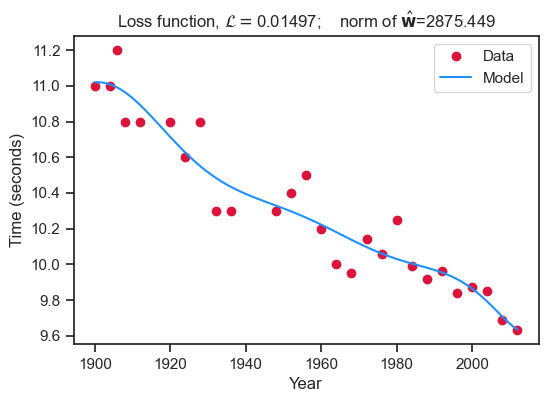

In [10]:
w_hat

array([[10.96434949],
       [-1.3094071 ]])

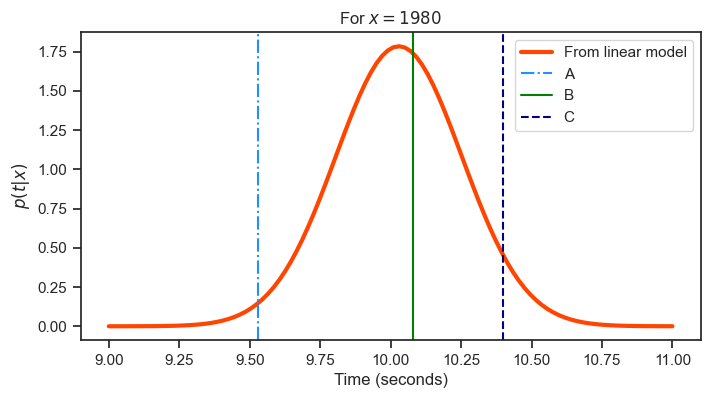

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

year_j = 1980
X_j = X_func(np.array( [ (year_j - min_year) / (max_year - min_year) ] ).reshape(1,1) )
time_j = float(X_j @ w_hat)

T_1980 = multivariate_normal(time_j, 0.05)
ti = np.linspace(9, 11, 100)
pt_x = T_1980.pdf(ti)

fig = plt.figure(figsize=(8,4))
plt.plot(ti, pt_x, '-', color='orangered', lw=3, label='From linear model')
plt.axvline(9.53, linestyle='-.', color='dodgerblue', label='A')
plt.axvline(10.08, linestyle='-', color='green', label='B')
plt.axvline(10.40, linestyle='--', color='navy', label='C')
plt.xlabel('Time (seconds)')
plt.ylabel(r'$p \left( t | x \right)$')
plt.title(r'For $x=1980$')
plt.legend()
plt.show()

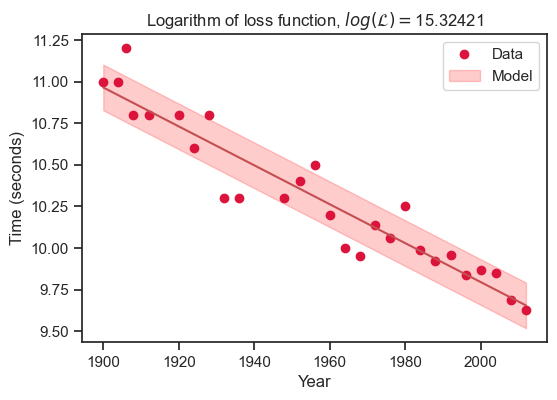

In [21]:
xi = xgrid*(max_year - min_year) + min_year
xi = xi.flatten()
sigma_hat_squared = float( (1. / N) * (t.T @ t - t.T @ X @ w_hat) )
sigma_hat = np.sqrt(sigma_hat_squared)
yi = xi* 0 + sigma_hat

loss_func =  -N/2 * np.log(np.pi * 2)  - N * np.log(sigma_hat) - \
                   1./(2 * sigma_hat_squared) * np.sum((X @ w_hat - t)**2) 

fig = plt.figure(figsize=(6,4))
a, = plt.plot(df['Year'].values, df['Time'].values, 'o', color='crimson', label='Data')
plt.plot(xi, time_grid, '-', color='r')
c = plt.fill_between(xi, time_grid.flatten()-yi, time_grid.flatten()+yi, color='red', alpha=0.2, label='Model')
plt.xlabel('Year')
plt.ylabel('Time (seconds)')
loss_title = r'Logarithm of loss function, $log \left( \mathcal{L} \right)=$'+str(np.around(float(loss_func), 5))
plt.title(loss_title)
plt.legend([a,c], ['Data', 'Model'])
plt.savefig('olympics_4.png', dpi=150, bbox_inches='tight')
plt.show()

In [22]:
w_hat

array([[10.96434949],
       [-1.3094071 ]])

In [19]:
N

27